# Numpy

**Table of contents**<a id='toc0_'></a>    
- [numpy](#toc1_)    
  - [리스트와 배열의 차이](#toc1_1_)    
    - [arange](#toc1_1_1_)    
    - [reshape](#toc1_1_2_)    
  - [배열 다루기](#toc1_2_)    
    - [샘플(행) 추출](#toc1_2_1_)    
    - [행과 열 추출](#toc1_2_2_)    
  - [배열 연산](#toc1_3_)    
    - [로직 연산](#toc1_3_1_)    
    - [행, 열 대상 연산](#toc1_3_2_)    
  - [배열 붙이기](#toc1_4_)    
  - [데이터프레임과 배열 전환](#toc1_5_)    
    - [배열로부터 데이터프레임 만들기](#toc1_5_1_)    
    - [데이터프레임에서 배열 추출](#toc1_5_2_)    
- [시각화, 그래프 그리기](#toc2_)    
  - [환경 설정](#toc2_1_)    
    - [한글 설정](#toc2_1_1_)    
  - [기본 그래프](#toc2_2_)    
  - [배열 데이터 시각화](#toc2_3_)    
    - [선 연결 그래프,  plot()](#toc2_3_1_)    
    - [스캐터플롯 (산포도),  scatter()](#toc2_3_2_)    
    - [히스토그램, hist()](#toc2_3_3_)    
    - [박스플롯, boxplot()](#toc2_3_4_)    
    - [막대 그래프, bar()](#toc2_3_5_)    
    - [데이터프레임의 시각화](#toc2_3_6_)    
    - [plot()](#toc2_3_7_)    
    - [scatter()](#toc2_3_8_)    
    - [boxplot()](#toc2_3_9_)    
    - [bar()](#toc2_3_10_)    
  - [임의의 x-y 관계 함수 그리기](#toc2_4_)    
- [배열로 직접 데이터 읽기](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[numpy](#toc0_)
- 데이터프레임은 테이블 구조 데이터의 편리한 조작을 위해서 사용
- 숫자만으로 구성된 데이터를 대상으로 "수학 연산"을 하기 위해서는 배열 (array)을 다루어야 한다
- 이를 위해 넘파이 라이브러리를 사용한다
 - 다 차원 배열 ndarray(n-dimensional array)를 다룬다

## <a id='toc1_1_'></a>[리스트와 배열의 차이](#toc0_)
- 리스트는 데이터 조작용 배열은 계산용
- 리스트, 배열, 튜플은 서로 타입을 쉽게 바꿀 수 있다

In [1]:
# 리스트의 복제
x = [1, 2, 10]
x * 3

[1, 2, 10, 1, 2, 10, 1, 2, 10]

In [2]:
import numpy as np
y = np.array(x)
y

array([ 1,  2, 10])

In [3]:
y * 3

array([ 3,  6, 30])

In [4]:
y + 100

array([101, 102, 110])

In [5]:
type(y)

numpy.ndarray

In [6]:
z = y.tolist()
z

[1, 2, 10]

In [7]:
type(z)

list

### <a id='toc1_1_1_'></a>[arange](#toc0_)
- range 타입의 "범위" 데이터를 생성한 후 이를 배열로 만든다

In [8]:
x = [i for i in range(12)]
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [8]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

### <a id='toc1_1_2_'></a>[reshape](#toc0_)
- 배열의 구조를 바꾼다 (차원 변경)

In [9]:
# 0~11 값으로 구성된 1차원 배열을 4x3 모양의 2차원 배열로 변경
x = np.arange(12).reshape(4,3)
x

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

## <a id='toc1_2_'></a>[배열 다루기](#toc0_)

### <a id='toc1_2_1_'></a>[샘플(행) 추출](#toc0_)
- 행단위의 추출은 인덱스를 지정

In [10]:
x[0]

array([0, 1, 2])

In [11]:
x[[0,2]]

array([[0, 1, 2],
       [6, 7, 8]])

In [12]:
x[0:3]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### <a id='toc1_2_2_'></a>[행과 열 추출](#toc0_)
- 행과 열을 지정하기 위해서는 [ , ]과 같이 ","로 행, 열을 구분해야 한다
- : 는 전체 범위를 나타낸다
- DataFrame.iloc의 전달인자 형식과 동일

In [13]:
x[:,[0,2]]

array([[ 0,  2],
       [ 3,  5],
       [ 6,  8],
       [ 9, 11]])

In [14]:
x[:,1:3]

array([[ 1,  2],
       [ 4,  5],
       [ 7,  8],
       [10, 11]])

In [15]:
x

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

## <a id='toc1_3_'></a>[배열 연산](#toc0_)
- 일반 스칼라 변수의 연산과 동일한 형식을 사용할 수 있다

In [16]:
x + 100

array([[100, 101, 102],
       [103, 104, 105],
       [106, 107, 108],
       [109, 110, 111]])

In [17]:
10*x

array([[  0,  10,  20],
       [ 30,  40,  50],
       [ 60,  70,  80],
       [ 90, 100, 110]])

### <a id='toc1_3_1_'></a>[로직 연산](#toc0_)

In [18]:
x > 5

array([[False, False, False],
       [False, False, False],
       [ True,  True,  True],
       [ True,  True,  True]])

In [19]:
# 5 보다 큰 값을 모두 9로 교체
x[x > 5] = 9
x

array([[0, 1, 2],
       [3, 4, 5],
       [9, 9, 9],
       [9, 9, 9]])

In [20]:
# 트랜스포즈는 행과 열의 위치를 바꾼다 (T 사용)
x.T

array([[0, 3, 9, 9],
       [1, 4, 9, 9],
       [2, 5, 9, 9]])

### <a id='toc1_3_2_'></a>[행, 열 대상 연산](#toc0_)

In [21]:
x = np.arange(24).reshape(6,4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [22]:
# 컬럼(열) 대상 연산
x.mean(axis=0)

array([10., 11., 12., 13.])

In [23]:
# 행 대상 연산
x.mean(axis=1)

array([ 1.5,  5.5,  9.5, 13.5, 17.5, 21.5])

In [24]:
# 배열 전체의 평균
x.mean()

11.5

In [25]:
# 컬럼별 최대값
x.max(axis=0)

array([20, 21, 22, 23])

In [26]:
# 컬럼별 최소값
x.min(axis=0)

array([0, 1, 2, 3])

## <a id='toc1_4_'></a>[배열 붙이기](#toc0_)
- 넘파이의 concatenate() 사용
- 행의 방향 또는 열의 방향으로 붙일 수 있다

In [27]:
data = np.arange(100,124).reshape(6,4)
data

array([[100, 101, 102, 103],
       [104, 105, 106, 107],
       [108, 109, 110, 111],
       [112, 113, 114, 115],
       [116, 117, 118, 119],
       [120, 121, 122, 123]])

In [28]:
data2 = np.concatenate((x, data))
data2

array([[  0,   1,   2,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11],
       [ 12,  13,  14,  15],
       [ 16,  17,  18,  19],
       [ 20,  21,  22,  23],
       [100, 101, 102, 103],
       [104, 105, 106, 107],
       [108, 109, 110, 111],
       [112, 113, 114, 115],
       [116, 117, 118, 119],
       [120, 121, 122, 123]])

In [29]:
data3 = np.concatenate((x, data), axis=1)
data3

array([[  0,   1,   2,   3, 100, 101, 102, 103],
       [  4,   5,   6,   7, 104, 105, 106, 107],
       [  8,   9,  10,  11, 108, 109, 110, 111],
       [ 12,  13,  14,  15, 112, 113, 114, 115],
       [ 16,  17,  18,  19, 116, 117, 118, 119],
       [ 20,  21,  22,  23, 120, 121, 122, 123]])

## <a id='toc1_5_'></a>[데이터프레임과 배열 전환](#toc0_)
- 데이터프레임과 배열은 쉽게 서로 전환할 수 있다
- 배열에는 인데스와 컬럼 이름이 포함되지 않는다 

In [30]:
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

### <a id='toc1_5_1_'></a>[배열로부터 데이터프레임 만들기](#toc0_)

In [31]:
# 배열을 데이터프레임으로 전환 (데이터프레임을 생성하면 된다)
import pandas as pd
df = pd.DataFrame(x)
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19
5,20,21,22,23


- 컬럼명과 인덱스가 자동으로 배정되었다

### <a id='toc1_5_2_'></a>[데이터프레임에서 배열 추출](#toc0_)
- 데이터프레임의 내용(수치 값)만 추출하여 배열을 만들려면 values를 사용한다

In [32]:
df.values

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

# <a id='toc2_'></a>[시각화, 그래프 그리기](#toc0_)
- 데이터 시각화는 데이터의 특성 파악 및 결과 설명에 필수적임

## <a id='toc2_1_'></a>[환경 설정](#toc0_)

### <a id='toc2_1_1_'></a>[한글 설정](#toc0_)
- matplotlib로 그림을 그릴 때 한글이 보이게 하는 설정

In [9]:
import platform, matplotlib
from matplotlib import rc

# '-' 기호 제대로 보이기
matplotlib.rcParams['axes.unicode_minus'] = False

# 윈도우
if platform.system() == 'Windows':
    rc('font', family="Malgun Gothic")
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [10]:
# 맥 컴퓨터를 사용하는 경우 레티나(고화질)로 출력하는 옵션
%config InlineBackend.figure_format = 'retina'

In [11]:
# 그래프를 지원하는 기본 모듈 불러오기
import matplotlib.pyplot as plt
%matplotlib inline
# 현재 기기에 그래프 출력하기

## <a id='toc2_2_'></a>[기본 그래프](#toc0_)
- plot, scatter, hist, boxplot, bar
- 배열에서 그래프를 그리는 방법과 데이터프레임에서 그리는 방법이 있다

## <a id='toc2_3_'></a>[배열 데이터 시각화](#toc0_)

### <a id='toc2_3_1_'></a>[선 연결 그래프,  plot()](#toc0_)
- 시간에 따른 변화를 나타내거나, x의 변화에 따른 y의 값을 표현

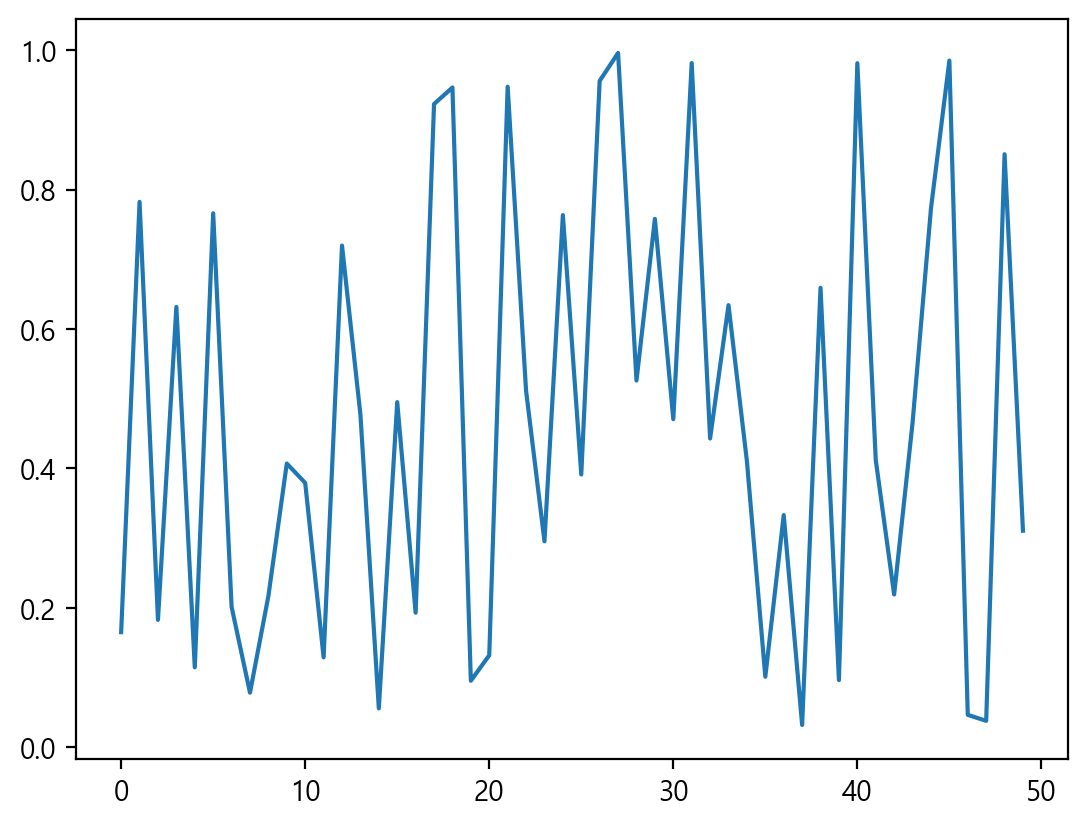

In [12]:
# 50개의 랜덤 넘버 그리기 (0~1사이의 랜덤 넘버)
x = range(50)
y = np.random.rand(50)
plt.plot(x,y)

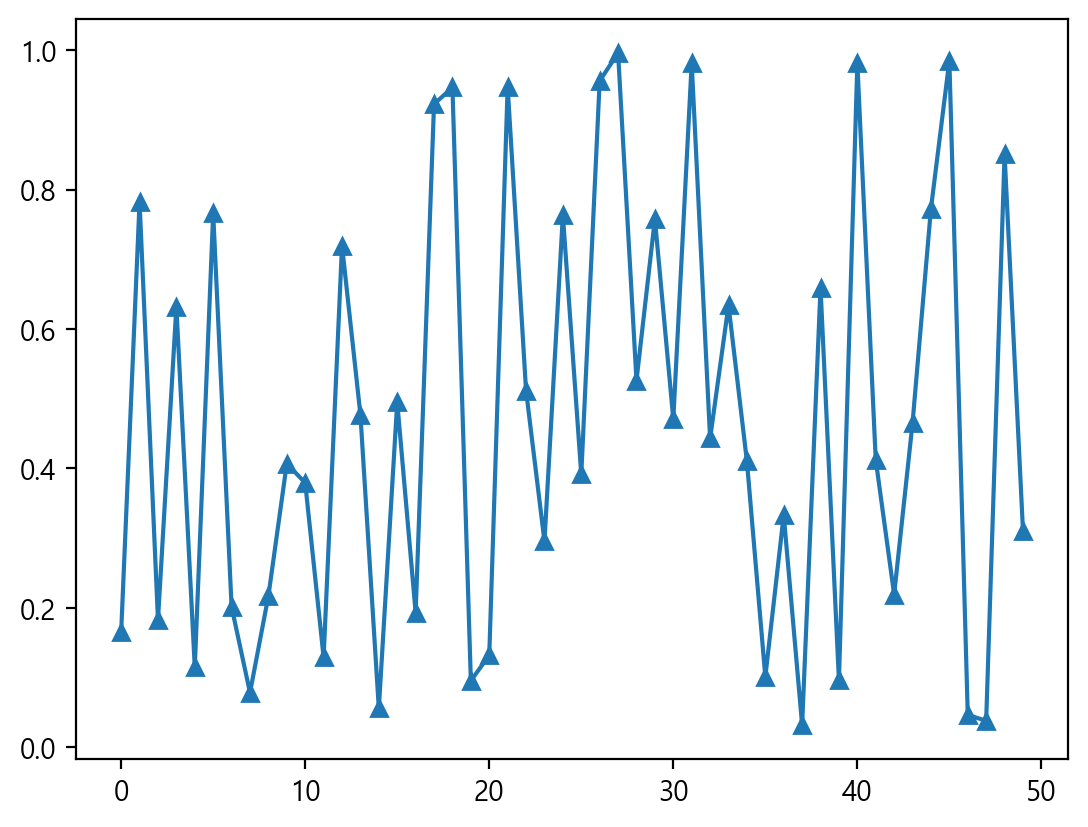

In [15]:
# 샘플 위치마다 마커를 표시할 수 있다
plt.plot(x,y, marker='^')

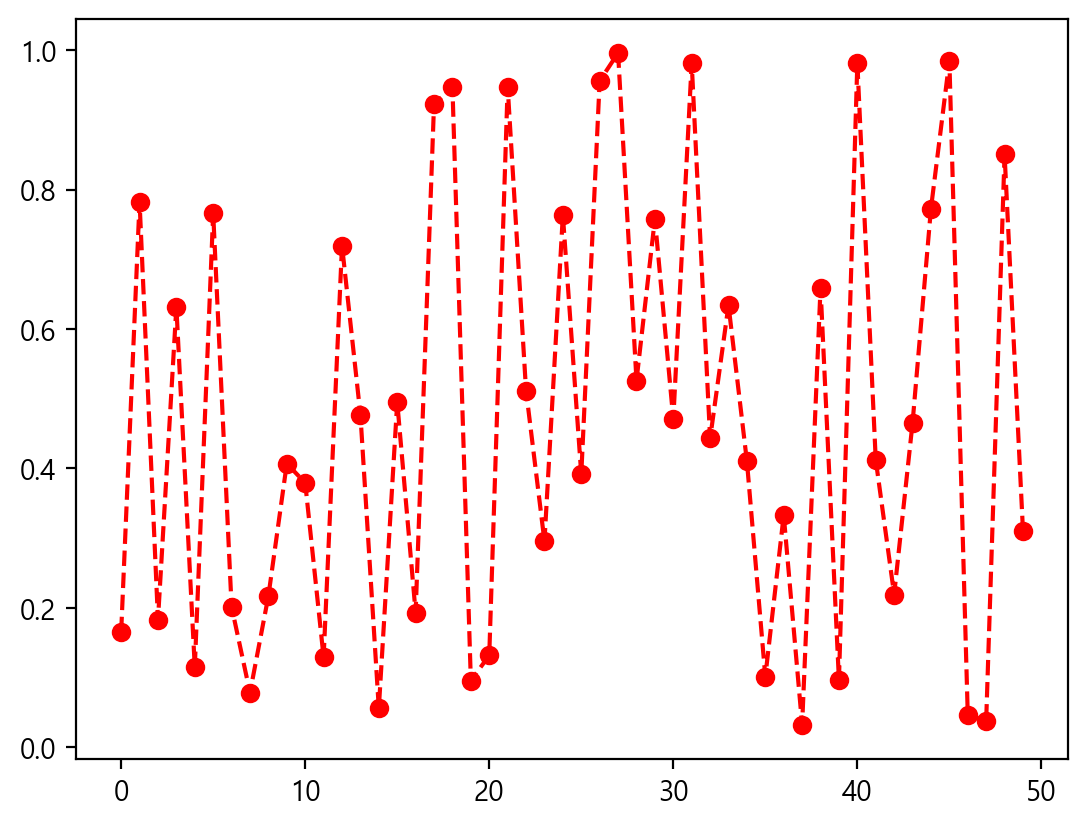

In [16]:
# 아래는 붉은색 점선을 사용
plt.plot(x,y,'r--',marker='o')

### <a id='toc2_3_2_'></a>[스캐터플롯 (산포도),  scatter()](#toc0_)
- 데이터 분석에서 가장 유용하게 사용된다

Text(0, 0.5, 'y 축입니다')

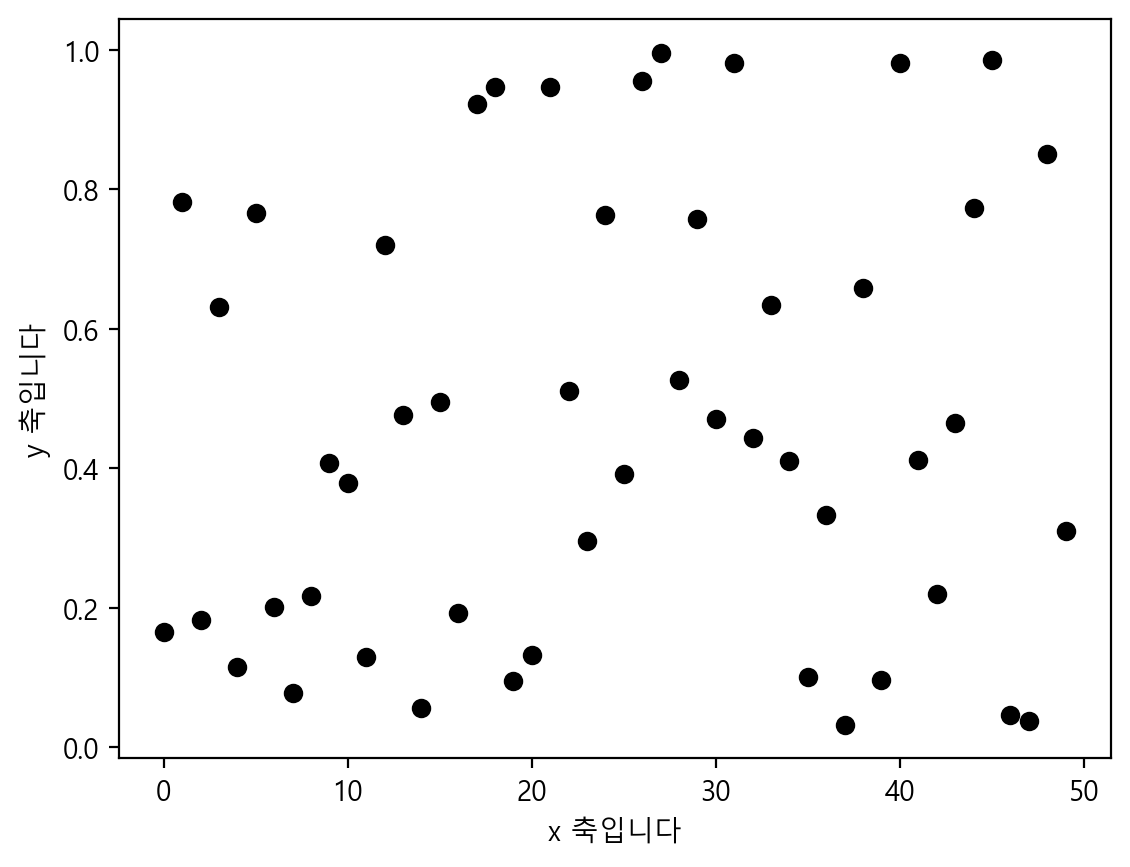

In [14]:
# 점의 색, 크기, 축이름을 지정
plt.scatter(x,y,c='k') # k는 검정색임
plt.xlabel('x 축입니다')
plt.ylabel('y 축입니다')

### <a id='toc2_3_3_'></a>[히스토그램, hist()](#toc0_)
- 확률 분포를 나타내는데 사용

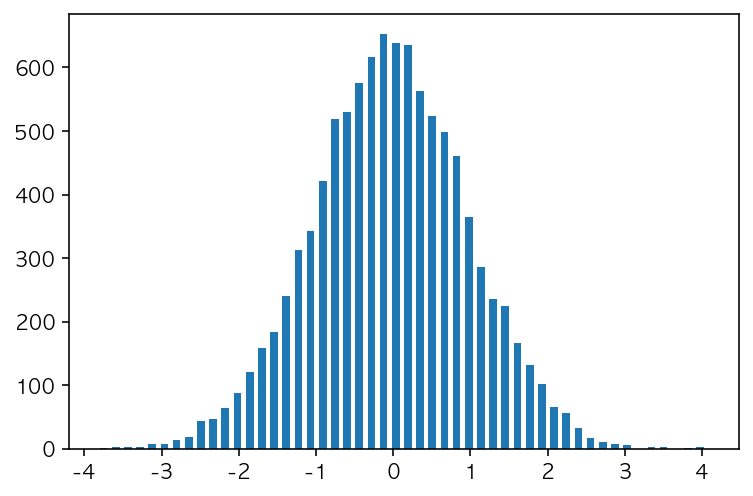

In [40]:
# 정규분포를 갖는 랜덤 넘버 발생, randn()
# 평균이 0이고 표준편차가 1인 샘플 n_samples개 발생
n_samples = 10000
x = np.random.randn(n_samples)
plt.hist(x, bins=50, width=0.1) # 빈의 수와 폭을 지정
plt.show()

### <a id='toc2_3_4_'></a>[박스플롯, boxplot()](#toc0_)
- 평균값, 25%, 75%, 이상치 등을 표시한다

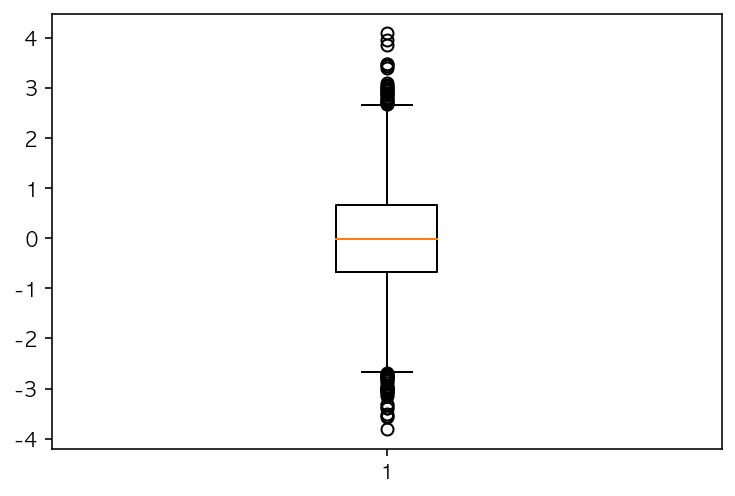

In [41]:
plt.boxplot(x)
plt.show()

### <a id='toc2_3_5_'></a>[막대 그래프, bar()](#toc0_)
- 수치의 상대적인 값을 높이로 표시
- 수평으로 그리려면 barh() 사용

In [42]:
y = np.random.rand(5)
y

array([0.43635382, 0.30464296, 0.06082457, 0.3851419 , 0.40285918])

<BarContainer object of 5 artists>

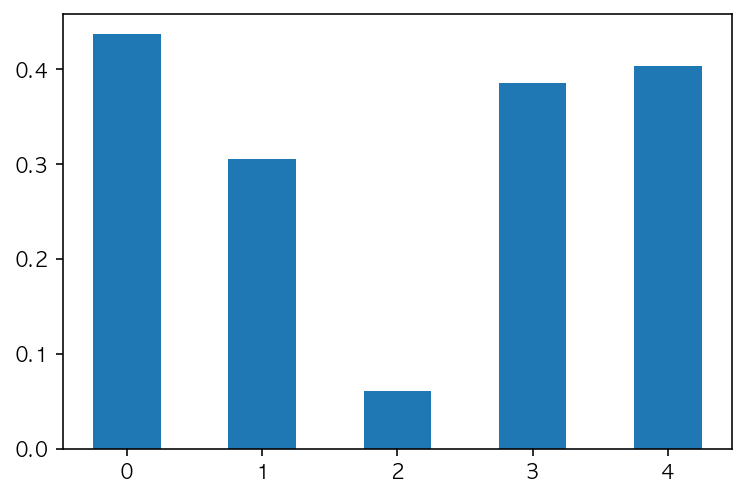

In [43]:
# x축에는 샘플의 갯수를 y축에는 값을 지정
plt.bar(range(len(y)), y, width=0.5)

<BarContainer object of 5 artists>

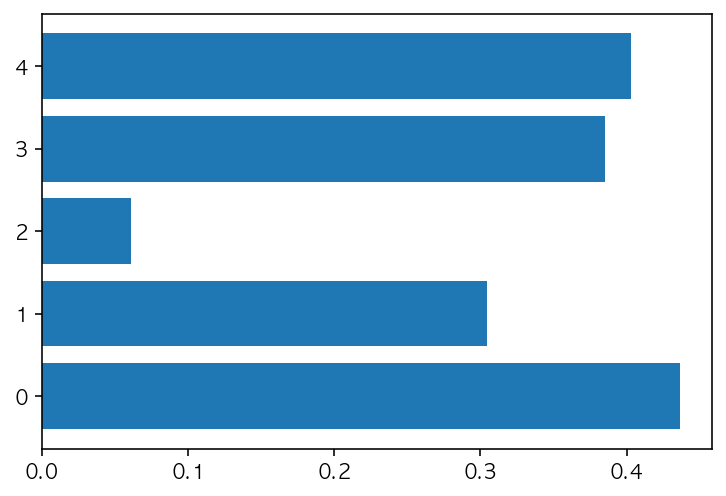

In [44]:
# 수평으로 그리기 (horizontal), barh()
plt.barh(range(len(y)), y)

### <a id='toc2_3_6_'></a>[데이터프레임의 시각화](#toc0_)
- 200명의 키와 몸무게를 랜덤하게 생성하고 데이터프레임으로 만든다

In [45]:
# 키의 평균과 표준편차는 170, 3
# 몸무게의 평균과 표준편차는 68, 4
n_samples = 200
x1 = np.random.randn(n_samples) * 3 + 170
x2 = np.random.randn(n_samples) * 4 + 68
df = pd.DataFrame({"키":x1, "몸무게":x2})
df

,키,몸무게
0,172.531040,72.340931
1,173.110047,67.759186
2,170.126569,68.345410
3,171.938593,69.694108
4,173.133920,73.621448
...,...,...
195,169.553680,71.845908
196,164.152609,68.503923
197,166.395336,63.250251
198,169.762699,68.152396


### <a id='toc2_3_7_'></a>[plot()](#toc0_)

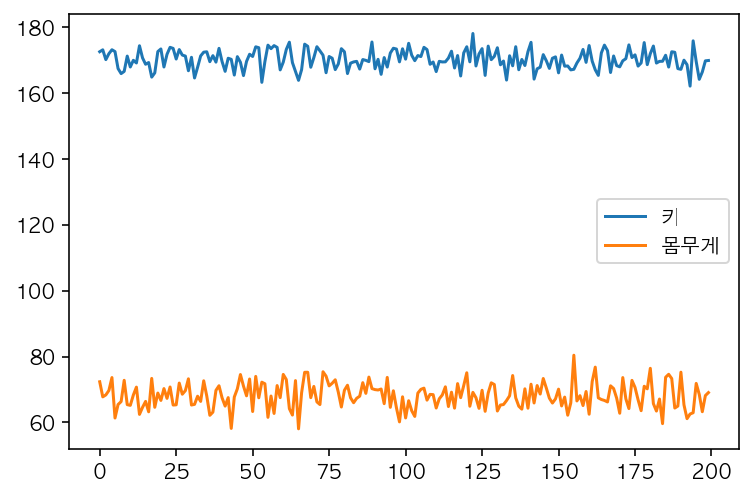

In [46]:
# 200명의 샘플 보기
df.plot()

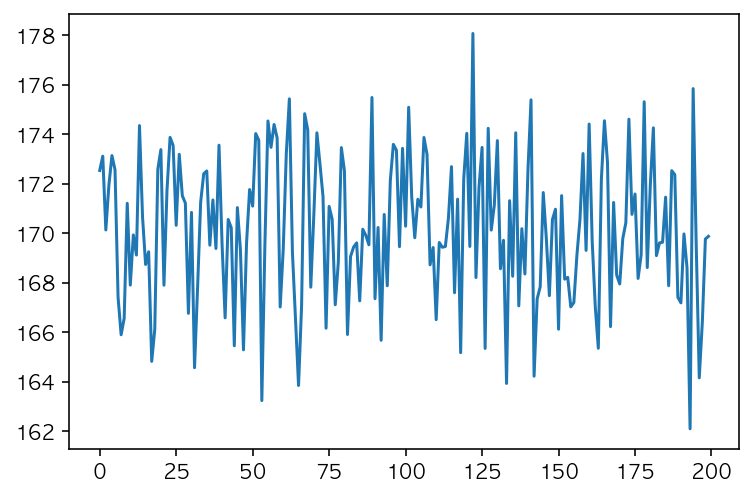

In [47]:
# 키만 보기
df["키"].plot()

### <a id='toc2_3_8_'></a>[scatter()](#toc0_)

Text(0, 0.5, '몸무게')

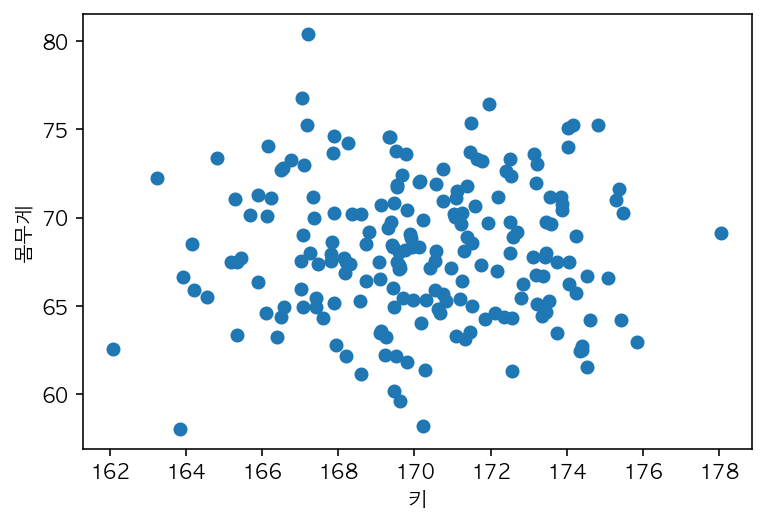

In [48]:
# 산포도
plt.scatter(df["키"], df["몸무게"])
plt.xlabel('키')
plt.ylabel('몸무게')

### <a id='toc2_3_9_'></a>[boxplot()](#toc0_)

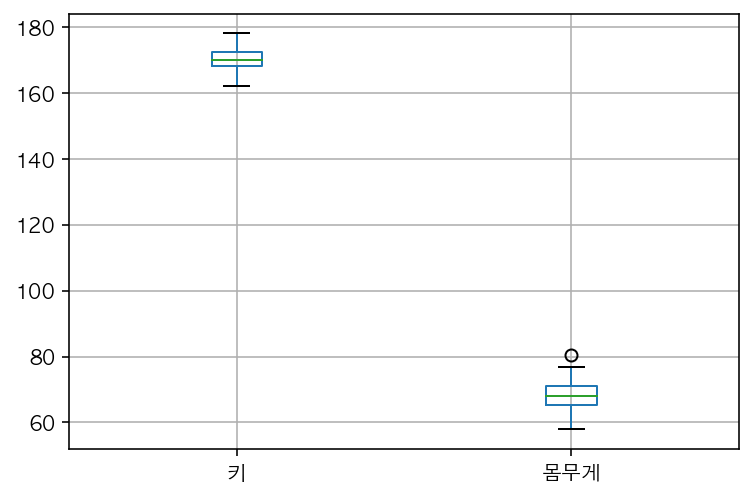

In [49]:
df.boxplot()

### <a id='toc2_3_10_'></a>[bar()](#toc0_)

<BarContainer object of 10 artists>

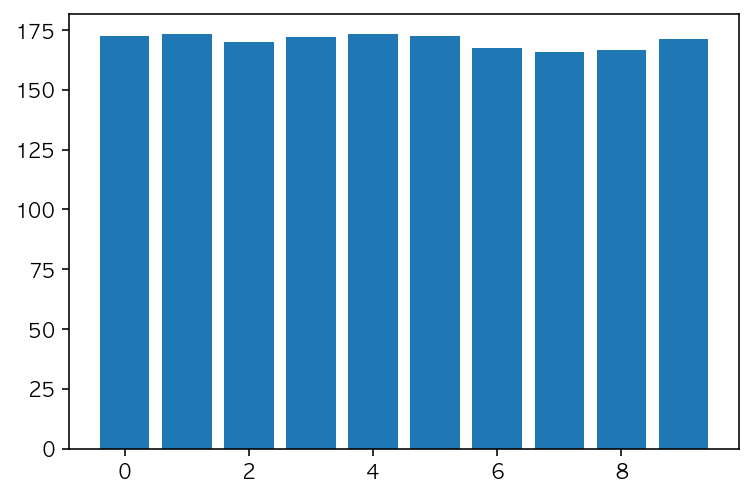

In [50]:
n = 10 # 샘플 10명의 키를 막대 그래프로 그려본다
plt.bar(range(n), df["키"][:n])

## <a id='toc2_4_'></a>[임의의 x-y 관계 함수 그리기](#toc0_)
- 일정 범위 값을 등간격으로 나누는 함수 np.linspace()를 이용
- 공간상 점들을 연결한다

In [51]:
# 0~20 사이를 등간격으로 나눈 값을 얻는다
xs=np.linspace(0,10,20) 
xs

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

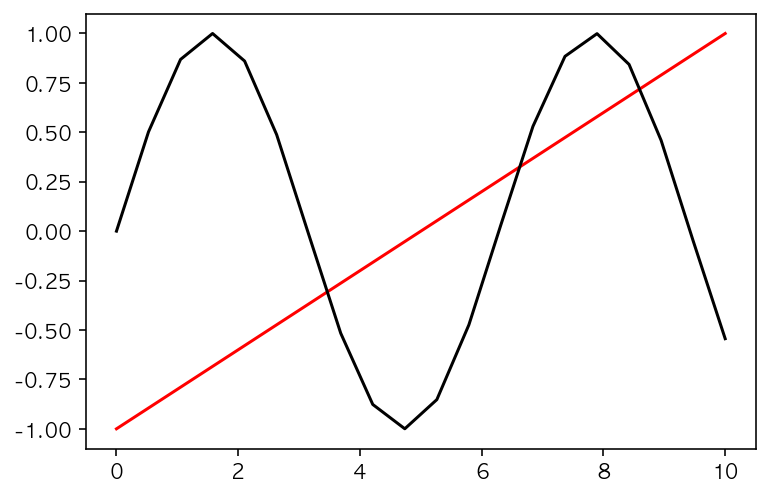

In [52]:
# 임의의 x-y 관계식을 그래프로 그리기
plt.plot(xs, 0.2*xs-1, c='r') # y = 0.2 * x - 1
plt.plot(xs, np.sin(xs), c='k') # y = sin(x)

# <a id='toc3_'></a>[배열로 직접 데이터 읽기](#toc0_)
- loadtxt() 사용
- 대용량의 숫자 데이터를 "데이터프레임으로 읽지 않고" 배열로 직접 로드하는 방법 (속도 개선)

In [53]:
# 대용량(?) 데이터 생성
x = np.arange(63).reshape(7,9)
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62]])

In [54]:
x.dtype

dtype('int64')

In [55]:
# csv 파일로 저장
np.savetxt("big.csv", x, fmt='%d', delimiter=",")

In [56]:
with open('big.csv') as f:
    contents = f.read()
    print(contents)

0,1,2,3,4,5,6,7,8
9,10,11,12,13,14,15,16,17
18,19,20,21,22,23,24,25,26
27,28,29,30,31,32,33,34,35
36,37,38,39,40,41,42,43,44
45,46,47,48,49,50,51,52,53
54,55,56,57,58,59,60,61,62



In [57]:
# 아래에서 !는 운영체제 명령을 수행한다
# !cat big.csv # 리눅스에서
# !type big.csv # 윈도우에서

In [58]:
# csv 파일을 배열로 바로 읽기
y = np.loadtxt("big.csv", delimiter=',')
y

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12., 13., 14., 15., 16., 17.],
       [18., 19., 20., 21., 22., 23., 24., 25., 26.],
       [27., 28., 29., 30., 31., 32., 33., 34., 35.],
       [36., 37., 38., 39., 40., 41., 42., 43., 44.],
       [45., 46., 47., 48., 49., 50., 51., 52., 53.],
       [54., 55., 56., 57., 58., 59., 60., 61., 62.]])